In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

%matplotlib inline

# Load Dataset

In [2]:
users=pd.read_csv('users.csv',parse_dates=['install_date'])

In [3]:
users.head()

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2
2,2,2019-03-06,en,US,"iPod7,1",8.4.1
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1


In [4]:
print('Install Dates are between:',min(users['install_date']),'and', max(users['install_date']))

Install Dates are between: 2019-03-01 00:00:00 and 2019-03-07 00:00:00


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       22576 non-null  int64         
 1   install_date  22576 non-null  datetime64[ns]
 2   lang          22576 non-null  object        
 3   country       22564 non-null  object        
 4   hw_ver        22576 non-null  object        
 5   os_ver        22576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.0+ MB


In [6]:
print('Number of unique users:',len(users['user_id'].unique()))

Number of unique users: 22576


In [7]:
sessions=pd.read_csv('sessions.csv',parse_dates=['date','ts'])

In [8]:
print('Number of unique users in sessions:',len(sessions['user_id'].unique()))

Number of unique users in sessions: 22544


In [9]:
sessions['count']=1

In [10]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722955 entries, 0 to 722954
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   user_id                        722955 non-null  int64         
 1   ts                             722955 non-null  datetime64[ns]
 2   date                           722955 non-null  datetime64[ns]
 3   session_num                    722955 non-null  int64         
 4   last_session_termination_type  0 non-null       float64       
 5   count                          722955 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 33.1 MB


In [11]:
sessions.describe()

,user_id,session_num,last_session_termination_type,count
count,722955.000000,722955.000000,0.0,722955.0
mean,11310.115089,106.523894,NaN,1.0
std,6580.220411,169.429726,NaN,0.0
min,0.000000,1.000000,NaN,1.0
25%,5493.000000,14.000000,NaN,1.0
50%,11317.000000,45.000000,NaN,1.0
75%,17065.000000,124.000000,NaN,1.0
max,22575.000000,1919.000000,NaN,1.0


In [12]:
iaps=pd.read_csv('iaps.csv',parse_dates=['date','ts'])

In [13]:
iaps.head()

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760


In [14]:
iaps['prod_name'].nunique()

19

In [15]:
print('Number of unique users in iaps:',len(iaps['user_id'].unique()))

Number of unique users in iaps: 1526


In [16]:
iaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    6685 non-null   int64         
 1   ts         6685 non-null   datetime64[ns]
 2   date       6685 non-null   datetime64[ns]
 3   prod_name  6685 non-null   object        
 4   prod_type  6685 non-null   object        
 5   rev        6685 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 313.5+ KB


In [17]:
spendevents=pd.read_csv('spendevents.csv',parse_dates=['date','ts'])

In [18]:
spendevents.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [19]:
print('Number of unique users in spendevents:',len(spendevents['user_id'].unique()))

Number of unique users in spendevents: 18017


In [20]:
spendevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107764 entries, 0 to 107763
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    107764 non-null  int64         
 1   ts         107764 non-null  datetime64[ns]
 2   date       107764 non-null  datetime64[ns]
 3   story      107764 non-null  object        
 4   chapter    107764 non-null  int64         
 5   spendtype  106420 non-null  object        
 6   currency   107764 non-null  object        
 7   amount     107764 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 6.6+ MB


In [21]:
spendevents.describe()

,user_id,chapter,amount
count,107764.000000,107764.000000,1.077640e+05
mean,11281.757062,3.017585,-4.262989e+02
std,6503.598235,5.292995,3.539171e+04
min,0.000000,0.000000,-3.000004e+06
25%,5682.750000,0.000000,-2.200000e+01
50%,11282.000000,0.000000,0.000000e+00
75%,16873.000000,4.000000,0.000000e+00
max,22575.000000,89.000000,3.360000e+02


In [22]:
#filter to see three types of spendtype
spendevents[spendevents['user_id']==2062].sort_values('ts')

,user_id,ts,date,story,chapter,spendtype,currency,amount
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27


In [23]:
spendevents['spendtype'].unique()

array(['earnGemsCounter', 'IAP', 'premiumChoice', nan, 'valuepack'],
      dtype=object)

In [24]:
spendevents[spendevents['spendtype']=='valuepack'].head(6)

,user_id,ts,date,story,chapter,spendtype,currency,amount
27107,9984,2019-04-15 20:16:49,2019-04-16,story_15,10,valuepack,gems,-322
32772,5782,2019-04-17 05:33:26,2019-04-17,story_1,4,valuepack,gems,-82
52405,5987,2019-04-17 05:02:48,2019-04-17,story_4,24,valuepack,gems,-217
52406,5987,2019-04-17 05:02:48,2019-04-17,story_4,24,valuepack,gems,-217
57519,8874,2019-04-17 07:46:03,2019-04-17,story_2,0,valuepack,gems,-217
59187,185,2019-04-20 07:52:28,2019-04-20,story_2,17,valuepack,gems,-322


In [25]:
spendevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107764 entries, 0 to 107763
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    107764 non-null  int64         
 1   ts         107764 non-null  datetime64[ns]
 2   date       107764 non-null  datetime64[ns]
 3   story      107764 non-null  object        
 4   chapter    107764 non-null  int64         
 5   spendtype  106420 non-null  object        
 6   currency   107764 non-null  object        
 7   amount     107764 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 6.6+ MB


In [26]:
spendevents['spendtype'].isnull().sum()

1344

# Data Preprocessing

In [27]:
users.shape, sessions.shape,iaps.shape,spendevents.shape

((22576, 6), (722955, 6), (6685, 6), (107764, 8))

In [28]:
#Remove duplicate records 

iaps=iaps.drop_duplicates(subset=['user_id','ts'])
spendevents=spendevents.drop_duplicates(subset=['user_id','ts'])
sessions=sessions.drop_duplicates(subset=['user_id','ts'])

In [29]:
users.shape, sessions.shape,iaps.shape,spendevents.shape

((22576, 6), (722787, 6), (6622, 6), (96603, 8))

## Editing User Table

In [30]:
users[['device','version']]=users['hw_ver'].str.split(',',1,expand=True)

In [31]:
users['dayofweek']=users['install_date'].apply(lambda x: x.dayofweek)

In [32]:
users['os_ver'].nunique()

31

In [33]:
users['os']=users['os_ver'].str.split('.',0,expand=True)[0]+'.'+users['os_ver'].str.split('.',0,expand=True)[1]

In [34]:
users['os'].nunique()

12

In [35]:
users.head()

,user_id,install_date,lang,country,hw_ver,os_ver,device,version,dayofweek,os
0,0,2019-03-01,en,US,"iPhone4,1",9.1,iPhone4,1,4,9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2,iPod5,1,4,8.1
2,2,2019-03-06,en,US,"iPod7,1",8.4.1,iPod7,1,2,8.4
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1,iPhone8,1,6,9.2
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1,iPhone5,4,6,9.2


## Aggregate session table

In [36]:
grouped1=sessions[['date','user_id']].groupby('user_id').min().reset_index()
grouped2=sessions[['count','user_id']].groupby('user_id').sum().reset_index()
grouped3=sessions[['date','user_id']].groupby('user_id').max().reset_index()
grouped4=sessions.groupby(['user_id'])['session_num'].apply(lambda x: x.value_counts().index[0]).reset_index()
groupedsession=pd.merge(left=grouped1,right=grouped2,how='left',on='user_id')
groupedsession=pd.merge(left=groupedsession, right=grouped3,how='left',on='user_id')
groupedsession=pd.merge(left=groupedsession, right=grouped4,how='left',on='user_id')
groupedsession.columns=['user_id','first_session_date','total_session_count','last_session_date','most_session_played']

In [37]:
groupedsession['session_date_diff']=(groupedsession['last_session_date']-groupedsession['first_session_date']).dt.days

In [38]:
groupedsession.head()

,user_id,first_session_date,total_session_count,last_session_date,most_session_played,session_date_diff
0,0,2019-03-01,12,2019-03-05,1,4
1,1,2019-03-01,34,2019-03-23,12,22
2,2,2019-03-06,39,2019-04-30,10,55
3,3,2019-03-03,3,2019-03-03,1,0
4,4,2019-03-03,3,2019-03-06,1,3


## Cleaning iaps table

### Visualization of Date Feature

Before aggregate, we can also look at the visulization of what iaps table looks like

In [39]:
iaps['dayofweek']=iaps['date'].apply(lambda x:x.dayofweek)
iaps['month']=iaps['date'].apply(lambda x:x.month)
iaps['day']=iaps['date'].apply(lambda x:x.day)

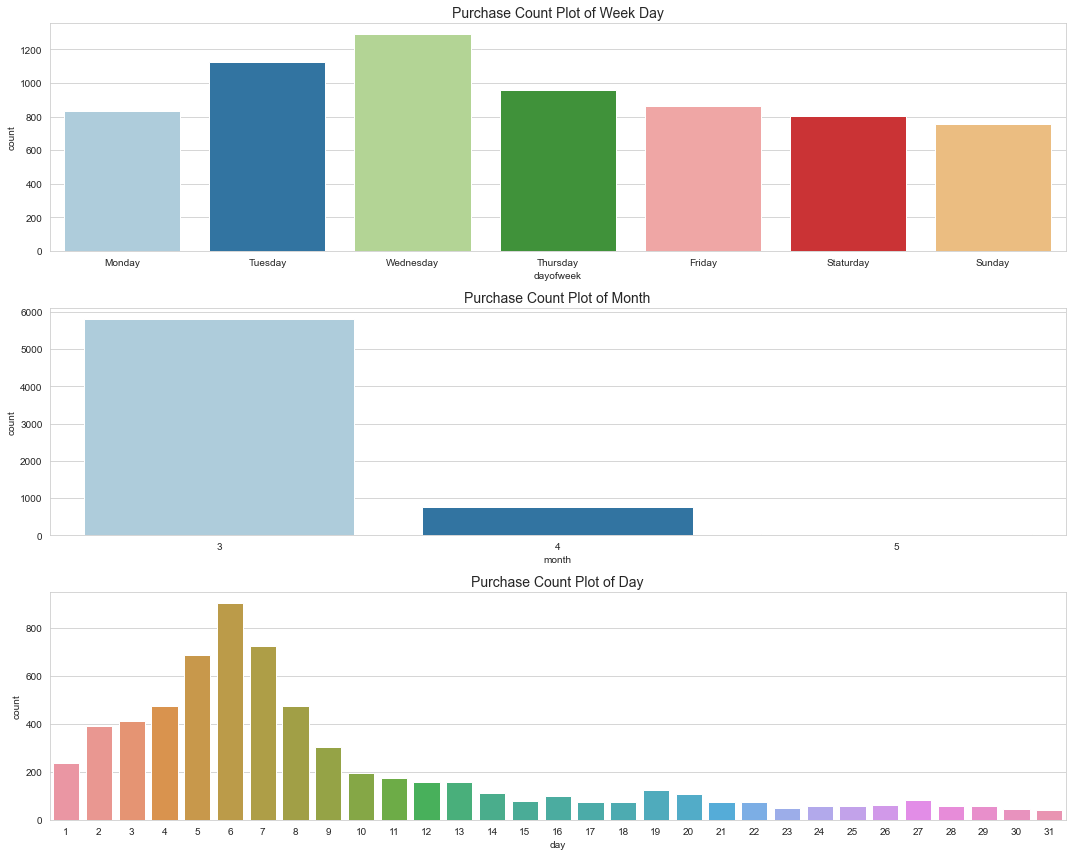

In [40]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))

fig, ax=plt.subplots(nrows=3,ncols=1,figsize=(15,12))
sns.countplot(x='dayofweek', data=iaps,ax=ax[0])
ax[0].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Staturday','Sunday'])
ax[0].set_title('Purchase Count Plot of Week Day', fontsize=14)

sns.countplot(x='month',data=iaps,ax=ax[1])
ax[1].set_title('Purchase Count Plot of Month', fontsize=14)

sns.countplot(x='day',data=iaps,ax=ax[2])
ax[2].set_title('Purchase Count Plot of Day', fontsize=14)

plt.tight_layout()
plt.show()

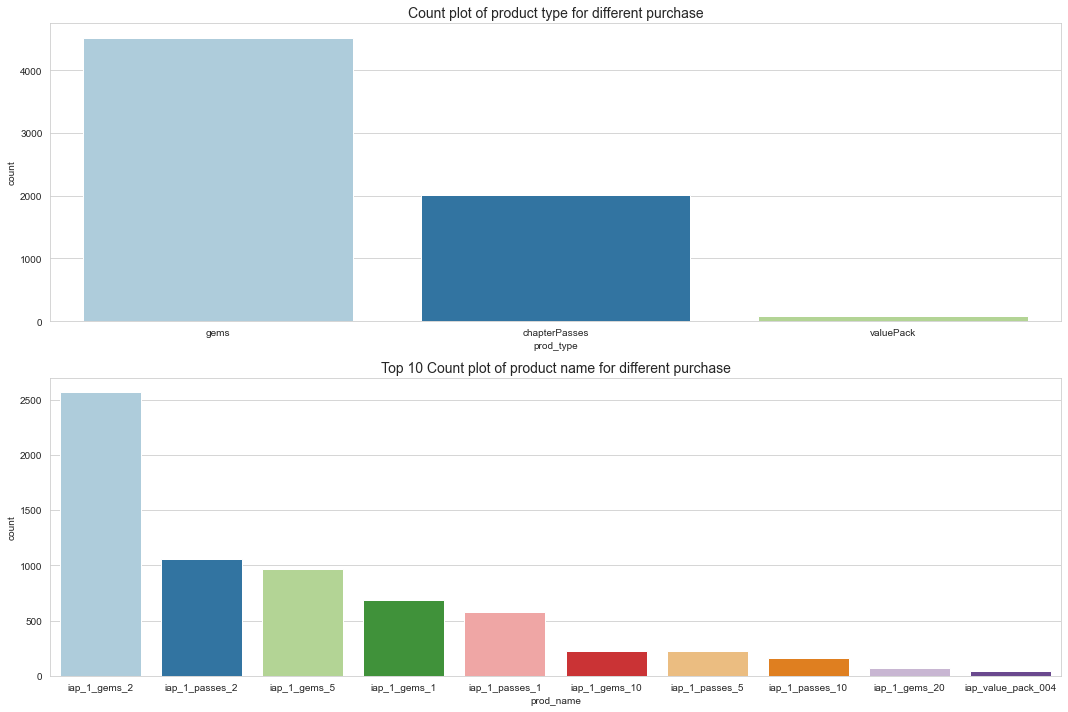

In [41]:
fig, ax=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.countplot(x='prod_type',data=iaps,ax=ax[0])
ax[0].set_title('Count plot of product type for different purchase',fontsize=14)

sns.countplot(x='prod_name',data=iaps,ax=ax[1],
              order=iaps.prod_name.value_counts().iloc[:10].index)
ax[1].set_title('Top 10 Count plot of product name for different purchase',
                fontsize=14)


plt.tight_layout()
plt.show()

Gems are the most bought product and ipap_1_gem_2 is the most popular product name

### Table Aggregating

In [42]:
iaps.head()

,user_id,ts,date,prod_name,prod_type,rev,dayofweek,month,day
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760,0,3,4
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760,0,3,4
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410,0,3,4
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760,2,3,6
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760,2,3,6


In [43]:
grouped1=iaps[['user_id','date']].groupby('user_id').min().reset_index()
grouped2=iaps[['user_id','date']].groupby('user_id').count().reset_index()
grouped3=iaps[['user_id','date']].groupby('user_id').max().reset_index()
grouped4=iaps[['user_id','rev']].groupby('user_id').sum().reset_index()
groupediaps=pd.merge(left=grouped1,right=grouped2,how='left',on='user_id')
groupediaps=pd.merge(left=groupediaps, right=grouped3,how='left',on='user_id')
groupediaps=pd.merge(left=groupediaps, right=grouped4,how='left',on='user_id')
groupediaps.columns=['user_id','first_purchase_date','total_num_purchase','last_purchase_date','total_rev']

In [44]:
groupediaps['purchase_date_diff']=(groupediaps['last_purchase_date']-groupediaps['first_purchase_date']).dt.days
groupediaps['rev per purchase']=groupediaps['total_rev']/groupediaps['total_num_purchase']
groupediaps['converted']=1

In [45]:
#transform the categorical features and aggregate them by users
iaps.columns

Index(['user_id', 'ts', 'date', 'prod_name', 'prod_type', 'rev', 'dayofweek',
       'month', 'day'],
      dtype='object')

In [46]:
cate_col=['prod_name','prod_type']

In [47]:
dummy_df=pd.get_dummies(iaps,columns=cate_col)

In [48]:
dummy_feature=dummy_df.columns[7:]

In [49]:
for col in dummy_feature:
    dd=dummy_df[[col,'user_id']].groupby(['user_id']).sum().reset_index()
    groupediaps=pd.merge(left=dd,right=groupediaps,how='left',on='user_id')

In [50]:
groupediaps.head(3)

,user_id,prod_type_valuePack,prod_type_gems,prod_type_chapterPasses,prod_name_iap_value_pack_010,prod_name_iap_value_pack_009,prod_name_iap_value_pack_008,prod_name_iap_value_pack_007,prod_name_iap_value_pack_005,prod_name_iap_value_pack_004,...,prod_name_iap_1_gems_100,prod_name_iap_1_gems_10,prod_name_iap_1_gems_1,first_purchase_date,total_num_purchase,last_purchase_date,total_rev,purchase_date_diff,rev per purchase,converted
0,2,0,1,0,0,0,0,0,0,0,...,0,0,0,2019-03-07,1,2019-03-07,760,0,760.0,1
1,21,0,1,2,0,0,0,0,0,0,...,0,0,0,2019-03-09,3,2019-03-10,2280,1,760.0,1
2,36,0,5,1,0,0,0,0,0,0,...,0,0,3,2019-03-02,6,2019-03-03,4560,1,760.0,1


In [51]:
#we can also join the users table to look at the demographic information of the converted users
iaps_users=pd.merge(left=groupediaps,right=users,how='left',on='user_id')
iaps_users['days_to_first_purchase']=(iaps_users['first_purchase_date']-iaps_users['install_date']).dt.days

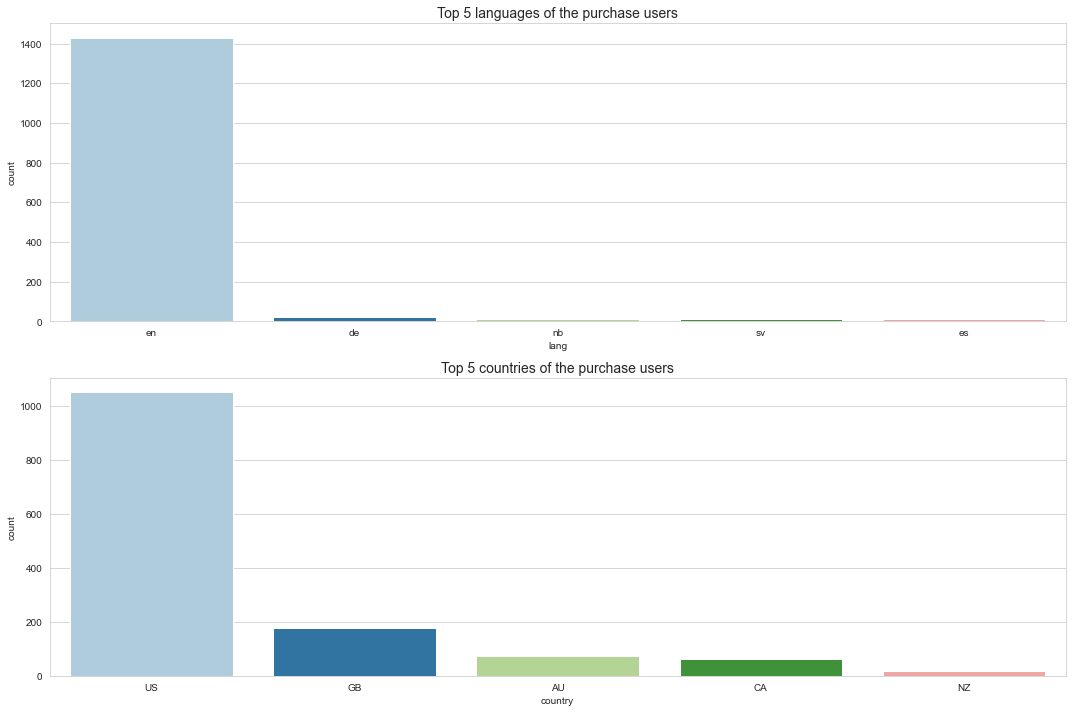

In [52]:
# look at language and country

fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(15,10))

sns.countplot(x='lang',data=iaps_users,
               order=iaps_users.lang.value_counts().iloc[:5].index,ax=ax[0])
ax[0].set_title('Top 5 languages of the purchase users',fontsize=14)

sns.countplot(x='country',data=iaps_users,
              order=iaps_users.country.value_counts().iloc[:5].index,ax=ax[1])
ax[1].set_title('Top 5 countries of the purchase users',fontsize=14)

plt.tight_layout()
plt.show()


In [53]:
df=iaps_users.lang.value_counts().iloc[:5]/1526
df.apply(lambda x: '{:.2f}%'.format(x*100))

en    93.71%
de     1.25%
nb     0.66%
sv     0.59%
es     0.59%
Name: lang, dtype: object

In [54]:
df=iaps_users.country.value_counts().iloc[:5]/1526
df.apply(lambda x: '{:.2f}%'.format(x*100))

US    68.87%
GB    11.53%
AU     4.78%
CA     4.00%
NZ     1.11%
Name: country, dtype: object

There are 1526 unique users who spent money to purchase, more than 90% of them use English in their app and approximately 70% of them are from the US. 

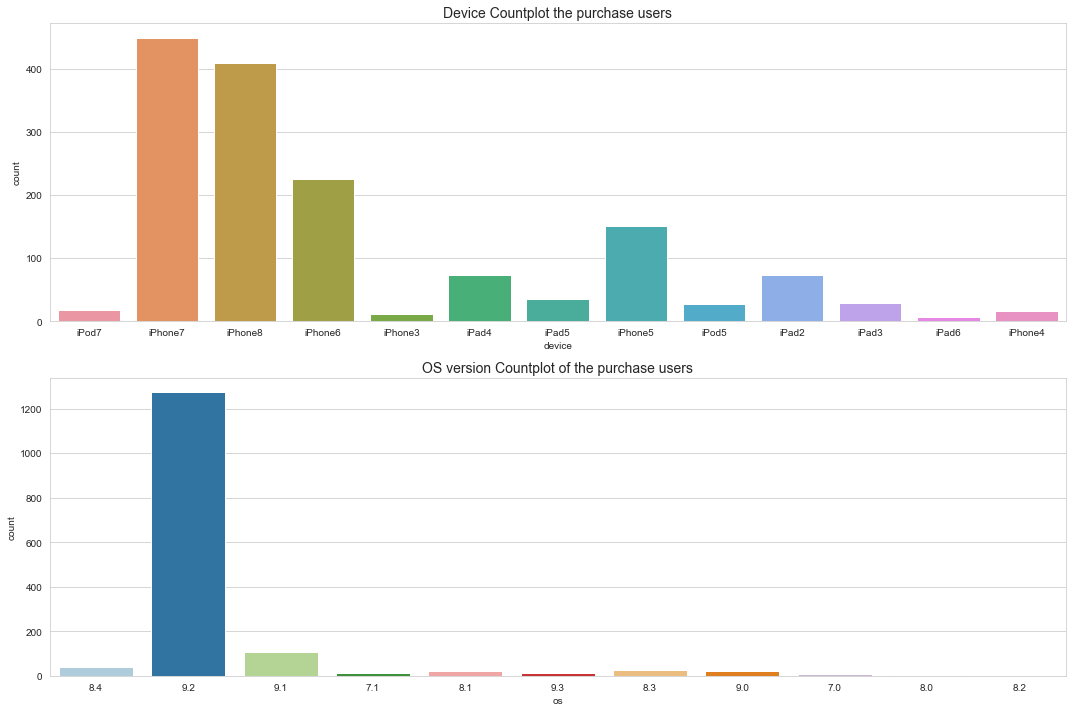

In [55]:
#device and os version
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(15,10))
sns.countplot(x='device',data=iaps_users,
              ax=ax[0])
ax[0].set_title('Device Countplot the purchase users',fontsize=14)

sns.countplot(x='os',data=iaps_users,
            ax=ax[1])
ax[1].set_title('OS version Countplot of the purchase users',fontsize=14)

plt.tight_layout()
plt.show()

Compare with ipads, most users play game using their iphone, and iphone7, iphone8, iphone6 are the top 3 devices. The majority of the purchase users use ios version 9.2. 

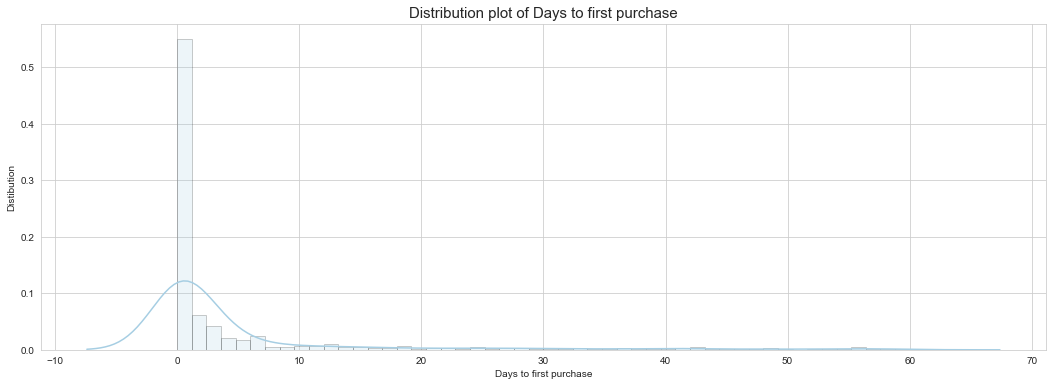

In [56]:
#days tooken for the first purchase
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))


fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(iaps_users['days_to_first_purchase'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('Days to first purchase')
ax.set_title('Distribution plot of Days to first purchase', fontsize=15)
plt.show()


In [57]:
print('averge days took after installation to purchase:', round(np.mean(iaps_users['days_to_first_purchase']),0))
print('maximum days took after installation to purchase:',np.max(iaps_users['days_to_first_purchase']))

averge days took after installation to purchase: 5.0
maximum days took after installation to purchase: 60


In [58]:

iaps_users['days_to_first_purchase'].value_counts()
df=iaps_users['days_to_first_purchase'].value_counts()/iaps_users.shape[0]
df.apply(lambda x: '{:.2f}%'.format(x*100))
print('There are', '{:.2f}% '.format(df[0:7].sum()*100), 'of converted users made their first purchase within 7 days')
print('There are', '{:.2f}% '.format(df[0].sum()*100), 'of converted users made their first purchase on install day')

There are 84.40%  of converted users made their first purchase within 7 days
There are 47.44%  of converted users made their first purchase on install day


Majority of the purchase are made within one week after the game is installed. 

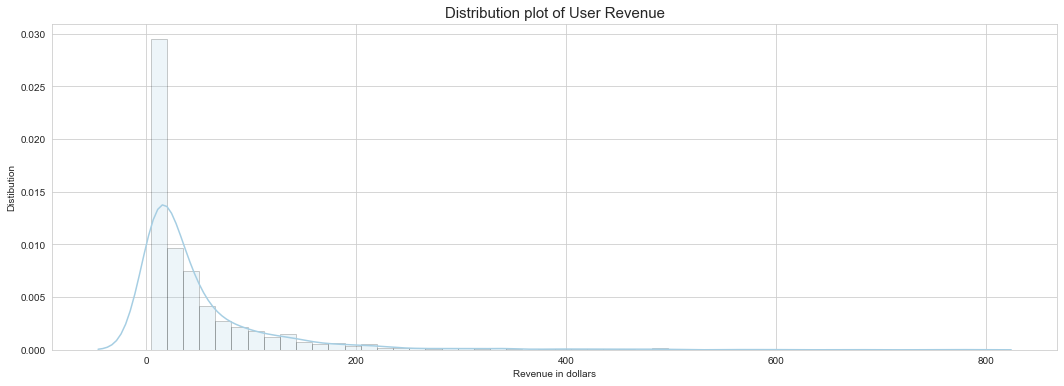

In [59]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))


fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(groupediaps['total_rev']/100, hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('Revenue in dollars')
ax.set_title('Distribution plot of User Revenue', fontsize=15)
plt.show()

Majority of the users spend less than 200 dollars in the time given, but there are some big outliers at the right tail

In [60]:
print('User average spending:',round(np.mean(groupediaps['total_rev'])/100,2),'dollars')
print('User minimum spending:',round(np.min(groupediaps['total_rev'])/100,2),'dollars')
print('User maximum spending:',round(np.max(groupediaps['total_rev'])/100,2),'dollars')

User average spending: 49.51 dollars
User minimum spending: 4.1 dollars
User maximum spending: 774.1 dollars


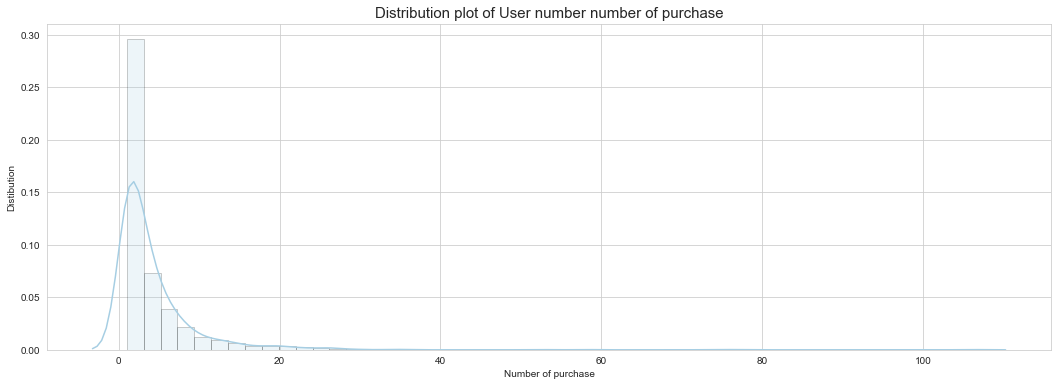

In [61]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))


fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(groupediaps['total_num_purchase'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('Number of purchase')
ax.set_title('Distribution plot of User number number of purchase', fontsize=15)
plt.show()

Majority of the users have less than 10 of total number purchases, but still there are outliers at the right tail and the distribution is right skewed. 

In [62]:
print('User average number of purchase:',round(np.mean(groupediaps['total_num_purchase']),0))
print('User minimum number of purchase:',np.min(groupediaps['total_num_purchase']))
print('User maximum number of purchase:',np.max(groupediaps['total_num_purchase']))

User average number of purchase: 4.0
User minimum number of purchase: 1
User maximum number of purchase: 106


In [63]:
df=groupediaps['total_num_purchase'].value_counts()/groupediaps.shape[0]
df.apply(lambda x: '{:.2f}%'.format(x*100))
print('There are', '{:.2f}% '.format(df[0:10].sum()*100), 'of converted users spent less than 10 times')
print('There are', '{:.2f}% '.format(df[0:1].sum()*100), 'of converted users spent only once')

There are 91.68%  of converted users spent less than 10 times
There are 32.37%  of converted users spent only once


In [64]:
groupediaps.shape

(1526, 30)

In [65]:
iaps_sessions=pd.merge(left=groupediaps,right=groupedsession,how='left',on='user_id')

In [66]:
iaps_sessions.head()

,user_id,prod_type_valuePack,prod_type_gems,prod_type_chapterPasses,prod_name_iap_value_pack_010,prod_name_iap_value_pack_009,prod_name_iap_value_pack_008,prod_name_iap_value_pack_007,prod_name_iap_value_pack_005,prod_name_iap_value_pack_004,...,last_purchase_date,total_rev,purchase_date_diff,rev per purchase,converted,first_session_date,total_session_count,last_session_date,most_session_played,session_date_diff
0,2,0,1,0,0,0,0,0,0,0,...,2019-03-07,760,0,760.0,1,2019-03-06,39,2019-04-30,10,55
1,21,0,1,2,0,0,0,0,0,0,...,2019-03-10,2280,1,760.0,1,2019-03-07,74,2019-04-11,61,35
2,36,0,5,1,0,0,0,0,0,0,...,2019-03-03,4560,1,760.0,1,2019-03-02,21,2019-03-13,18,11
3,51,0,7,3,0,0,0,0,0,0,...,2019-04-13,6550,42,655.0,1,2019-03-02,226,2019-04-29,117,58
4,85,0,1,0,0,0,0,0,0,0,...,2019-04-17,760,0,760.0,1,2019-03-07,13,2019-04-17,1,41


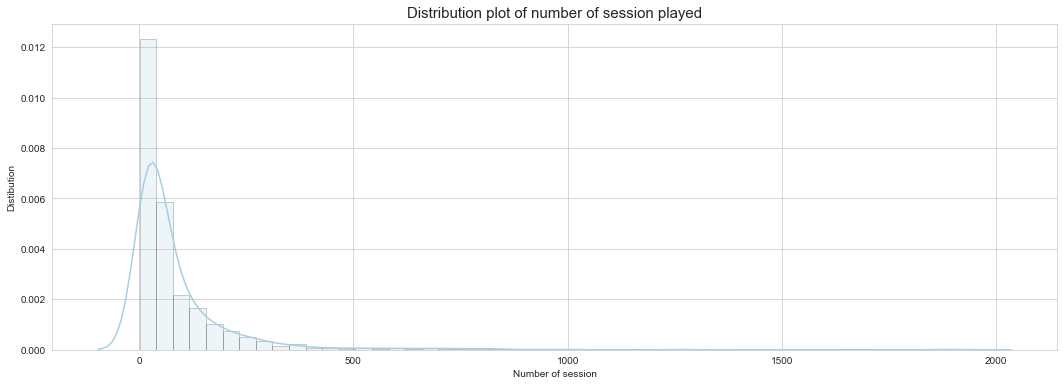

In [67]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Paired"))


fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(iaps_sessions['total_session_count'], hist_kws=hist_kws)
ax.set_ylabel('Distibution')
ax.set_xlabel('Number of session')
ax.set_title('Distribution plot of number of session played', fontsize=15)
plt.show()

In [68]:
print('The converted users played', round(np.mean(iaps_sessions['total_session_count']),0), 'sessions on average.')


The converted users played 86.0 sessions on average.


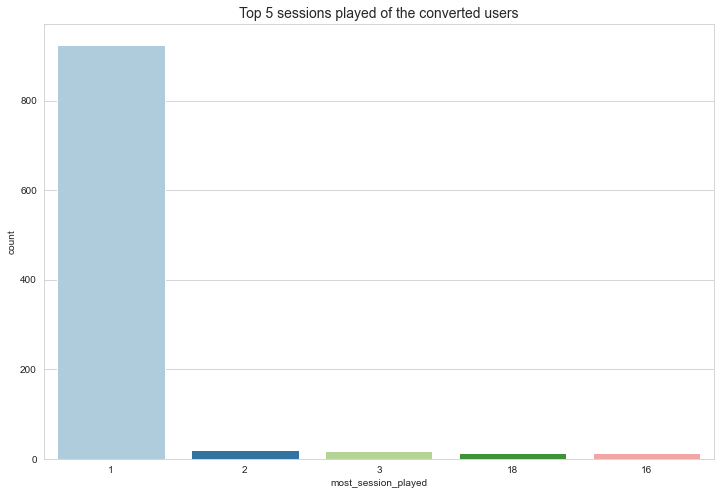

In [69]:
fig, ax=plt.subplots( figsize=(12,8))

sns.countplot(x='most_session_played',data=iaps_sessions,
               order=iaps_sessions.most_session_played.value_counts().iloc[:5].index)
ax.set_title('Top 5 sessions played of the converted users',fontsize=14)


plt.show()


Sessions 1 is the most played sessions for the converted users

## Aggregate Spendevents table

In [70]:
spendevents.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [71]:
grouped1=spendevents[['user_id','date']].groupby('user_id').min().reset_index()
grouped2=spendevents[['user_id','date']].groupby('user_id').count().reset_index()
grouped3=spendevents[['user_id','date']].groupby('user_id').max().reset_index()
grouped4=spendevents[['user_id','amount']].groupby('user_id').sum().reset_index()
groupedspend=pd.merge(left=grouped1,right=grouped2,how='left',on='user_id')
groupedspend=pd.merge(left=groupedspend, right=grouped3,how='left',on='user_id')
groupedspend=pd.merge(left=groupedspend, right=grouped4,how='left',on='user_id')
groupedspend.columns=['user_id','first_spend_date','total_num_spend','last_spend_date','total_amount']

In [72]:
groupedspend['spend_date_diff']=(groupedspend['last_spend_date']-groupedspend['first_spend_date']).dt.days

In [73]:
groupedspend.head()

,user_id,first_spend_date,total_num_spend,last_spend_date,total_amount,spend_date_diff
0,0,2019-03-01,1,2019-03-01,-22,0
1,1,2019-03-02,2,2019-03-03,-44,1
2,2,2019-03-06,7,2019-03-31,-43,25
3,3,2019-03-03,1,2019-03-03,-22,0
4,4,2019-03-03,1,2019-03-03,-22,0


In [74]:
#transform the categorical features and aggregate them by users
spendevents.columns

Index(['user_id', 'ts', 'date', 'story', 'chapter', 'spendtype', 'currency',
       'amount'],
      dtype='object')

In [75]:
df=spendevents['spendtype'].value_counts()/spendevents.shape[0]
df.apply(lambda x: '{:.2f}%'.format(x*100))

earnGemsCounter    80.97%
premiumChoice      13.14%
IAP                 4.60%
valuepack           0.04%
Name: spendtype, dtype: object

In [76]:
#for spendevents, there are some missing values for spendtype, and most of them have amount greater than 0, few has 
#amount 0, for simplicity, just use premiumChoice to fill the missing ones
spendevents['spendtype'].isnull().sum()

1201

In [77]:
spendevents['spendtype']=spendevents['spendtype'].fillna('premiumChoice')

In [78]:
cate_col=['story','chapter','spendtype']

In [79]:
print('Number of total classes in story:',spendevents['story'].nunique())
print('Number of total classes in chapter:',spendevents['chapter'].nunique())
print('Number of total classes in spendtype:',spendevents['spendtype'].nunique())

Number of total classes in story: 32
Number of total classes in chapter: 30
Number of total classes in spendtype: 4


In [80]:
dummy_df=pd.get_dummies(spendevents,columns=cate_col)

In [81]:
dummy_df.columns[5:]

Index(['story_story_1', 'story_story_10', 'story_story_11', 'story_story_12',
       'story_story_13', 'story_story_14', 'story_story_15', 'story_story_16',
       'story_story_17', 'story_story_18', 'story_story_19', 'story_story_2',
       'story_story_20', 'story_story_21', 'story_story_22', 'story_story_23',
       'story_story_24', 'story_story_25', 'story_story_26', 'story_story_27',
       'story_story_28', 'story_story_29', 'story_story_3', 'story_story_30',
       'story_story_31', 'story_story_32', 'story_story_4', 'story_story_5',
       'story_story_6', 'story_story_7', 'story_story_8', 'story_story_9',
       'chapter_0', 'chapter_2', 'chapter_3', 'chapter_4', 'chapter_5',
       'chapter_6', 'chapter_7', 'chapter_8', 'chapter_9', 'chapter_10',
       'chapter_11', 'chapter_12', 'chapter_13', 'chapter_14', 'chapter_15',
       'chapter_16', 'chapter_17', 'chapter_18', 'chapter_19', 'chapter_20',
       'chapter_21', 'chapter_22', 'chapter_23', 'chapter_24', 'chapter_25',
 

In [82]:
dummy_feature=dummy_df.columns[5:]

In [83]:
for col in dummy_feature:
    dd=dummy_df[[col,'user_id']].groupby(['user_id']).sum().reset_index()
    groupedspend=pd.merge(left=dd,right=groupedspend,how='left',on='user_id')

In [84]:
groupedspend.head()

,user_id,spendtype_valuepack,spendtype_premiumChoice,spendtype_earnGemsCounter,spendtype_IAP,chapter_89,chapter_46,chapter_32,chapter_31,chapter_26,...,story_story_13,story_story_12,story_story_11,story_story_10,story_story_1,first_spend_date,total_num_spend,last_spend_date,total_amount,spend_date_diff
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,2019-03-01,1,2019-03-01,-22,0
1,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,1,2019-03-02,2,2019-03-03,-44,1
2,2,0,2,4,1,0,0,0,0,0,...,0,0,0,0,4,2019-03-06,7,2019-03-31,-43,25
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,2019-03-03,1,2019-03-03,-22,0
4,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,2019-03-03,1,2019-03-03,-22,0


In [85]:
groupedspend.shape

(18017, 72)

## Combine all tables together

In [86]:
users.shape, groupedsession.shape,groupediaps.shape,groupedspend.shape

((22576, 10), (22544, 6), (1526, 30), (18017, 72))

In [87]:
#drop columns duo to duplicate inforamtion
users=users.drop(['hw_ver','os_ver'],axis=1)

In [88]:
full_data=pd.merge(left=users,right=groupedsession, how='left',on='user_id')

In [89]:
full_data=full_data.drop(['first_session_date','last_session_date'],axis=1)

In [90]:
full_data=pd.merge(left=full_data,right=groupedspend, how='left', on='user_id')

In [91]:
full_data=full_data.drop(['first_spend_date','last_spend_date'],axis=1)

In [92]:
full_data=pd.merge(left=full_data,right=groupediaps, how='left',on='user_id')

In [93]:
full_data['install_to_first_purchase']=(full_data['first_purchase_date']-full_data['install_date']).dt.days

In [94]:
#drop all date informaiton since we have differenced in days
full_data=full_data.drop(['install_date','first_purchase_date','last_purchase_date','rev per purchase'],axis=1)

In [95]:
#fill all the missing values with 0
full_data=full_data.fillna(0)

In [96]:
full_data['conv']=full_data['converted']
full_data.drop(['converted','user_id'],axis=1,inplace=True)

In [97]:
full_data.head()

,lang,country,device,version,dayofweek,os,total_session_count,most_session_played,session_date_diff,spendtype_valuepack,...,prod_name_iap_1_gems_20,prod_name_iap_1_gems_2,prod_name_iap_1_gems_100,prod_name_iap_1_gems_10,prod_name_iap_1_gems_1,total_num_purchase,total_rev,purchase_date_diff,install_to_first_purchase,conv
0,en,US,iPhone4,1,4,9.1,12.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,en,IN,iPod5,1,4,8.1,34.0,12.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,en,US,iPod7,1,2,8.4,39.0,10.0,55.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,760.0,0.0,1.0,1.0
3,nb,NO,iPhone8,1,6,9.2,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,en,GB,iPhone5,4,6,9.2,3.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
full_data.rename(columns={'conv':'converted'},inplace=True)


In [99]:
#data is highly imblanced
full_data['converted'].value_counts()/full_data.shape[0]

0.0    0.932406
1.0    0.067594
Name: converted, dtype: float64

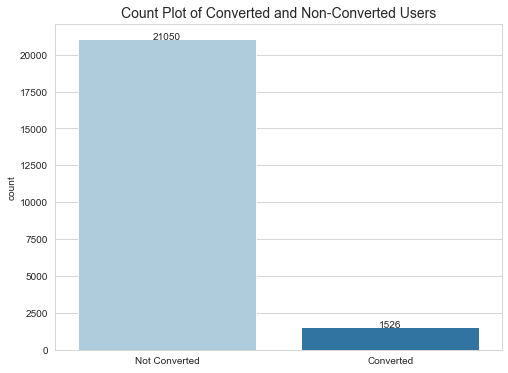

In [100]:
fig,ax=plt.subplots(figsize=(8,6))

g=sns.countplot(full_data['converted'])
g.set_xticklabels(['Not Converted', 'Converted'])
g.set_title('Count Plot of Converted and Non-Converted Users',fontsize=14)
g.set_xlabel('')

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)



plt.show()

There are three methods that can be used to solve the problems
1. Upsampling the converted users
2. Use SMOTE to generate more similar points for the purchase users
3. Downsampling the unconverted users, which does not work for this datasets due to small number 

# Building Model 

In [101]:
full_data.head()

,lang,country,device,version,dayofweek,os,total_session_count,most_session_played,session_date_diff,spendtype_valuepack,...,prod_name_iap_1_gems_20,prod_name_iap_1_gems_2,prod_name_iap_1_gems_100,prod_name_iap_1_gems_10,prod_name_iap_1_gems_1,total_num_purchase,total_rev,purchase_date_diff,install_to_first_purchase,converted
0,en,US,iPhone4,1,4,9.1,12.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,en,IN,iPod5,1,4,8.1,34.0,12.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,en,US,iPod7,1,2,8.4,39.0,10.0,55.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,760.0,0.0,1.0,1.0
3,nb,NO,iPhone8,1,6,9.2,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,en,GB,iPhone5,4,6,9.2,3.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
full_data.shape

(22576, 105)

In [103]:
full_data.columns

Index(['lang', 'country', 'device', 'version', 'dayofweek', 'os',
       'total_session_count', 'most_session_played', 'session_date_diff',
       'spendtype_valuepack',
       ...
       'prod_name_iap_1_gems_20', 'prod_name_iap_1_gems_2',
       'prod_name_iap_1_gems_100', 'prod_name_iap_1_gems_10',
       'prod_name_iap_1_gems_1', 'total_num_purchase', 'total_rev',
       'purchase_date_diff', 'install_to_first_purchase', 'converted'],
      dtype='object', length=105)

In [104]:
#seperate numeric and categorical features
cate_feat=full_data.columns[0:6]
num_feat=full_data.columns[6:104]

In [105]:
#check total number of features
len(cate_feat)+len(num_feat)

104

In [106]:
full_data['dayofweek']=full_data['dayofweek'].astype('object')

In [107]:
full_data[cate_feat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lang       22576 non-null  object
 1   country    22576 non-null  object
 2   device     22576 non-null  object
 3   version    22576 non-null  object
 4   dayofweek  22576 non-null  object
 5   os         22576 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


## Apply Standard Scaling

In [108]:
from sklearn import preprocessing

In [109]:
scaler=preprocessing.StandardScaler()

In [110]:
full_data[num_feat]=scaler.fit_transform(full_data[num_feat])

In [111]:
full_data.head()

,lang,country,device,version,dayofweek,os,total_session_count,most_session_played,session_date_diff,spendtype_valuepack,...,prod_name_iap_1_gems_20,prod_name_iap_1_gems_2,prod_name_iap_1_gems_100,prod_name_iap_1_gems_10,prod_name_iap_1_gems_1,total_num_purchase,total_rev,purchase_date_diff,install_to_first_purchase,converted
0,en,US,iPhone4,1,4,9.1,-0.262962,-0.224135,-0.531623,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
1,en,IN,iPod5,1,4,8.1,0.026069,0.011369,0.397710,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
2,en,US,iPod7,1,2,8.4,0.091758,-0.031450,2.101485,-0.037741,...,-0.041008,1.040699,-0.009413,-0.062186,-0.064576,0.365417,0.188872,-0.115324,0.229379,1.0
3,nb,NO,iPhone8,1,6,9.2,-0.381202,-0.224135,-0.738141,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
4,en,GB,iPhone5,4,6,9.2,-0.381202,-0.224135,-0.583252,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0


## Label Encoding for categorical features

In [112]:
LBL = preprocessing.LabelEncoder()

In [113]:
#there are some countries with 0,15
full_data['country'].unique()

array(['US', 'IN', 'NO', 'GB', 'TR', 'DK', 'PT', 'LT', 'PH', 'MX', 'VN',
       'ID', 'JP', 'BR', 'LY', 'PE', 'CH', 'CA', 'NL', 'BE', 'TH', 'ES',
       'IT', 'CZ', 'RU', 'RO', 'SE', 'ZA', 'AU', 'IL', 'HU', 'OM', 'AT',
       'EE', 'MY', 'CO', 'LA', 'EG', 'NZ', 'DE', 'IS', 'Ha', 'DZ', 'SA',
       'AE', 'ZW', '_C', 'SG', 'FR', 'FJ', 'AR', 'LB', 'KH', 'CL', 'BY',
       'HK', 'JO', 'AF', 'FI', 'KW', 'CN', 'GY', 'GM', 'KR', 'EC', 'BS',
       'TW', 'GE', 'UM', 'DO', 'IE', 'PA', 'NG', 'AL', 'AS', 'MK', 'Ko',
       'PS', 'HR', 'GR', 'VI', 'SK', 'AW', 0, 'TT', 'UG', 'BN', 'RS',
       'FO', 'HT', 'MM', 'VG', 'PR', 'PL', 'TN', 'GT', 'AD', 'MT', 'BD',
       'BB', 'QA', 'VU', 'AG', 'PK', 'MD', 'VE', 'CR', 'BH', 'LV', 'IQ',
       'CY', 'CF', 'YE', 'BZ', 'AZ', 'NC', 'UY', 'BT', 'UZ', 'LU', 'MA',
       'MR', 'BG', 'LK', 'SC', 'JM', 'KG', 'HN', 'IM', 'JE', 'BA', 'GH',
       'AM', 'AO', 'VC', 'GL', 'MO', 'GA', 'ME', 'TO', 'BO', 'UA', 'SI',
       'ZM', 'BW', 'MN', 'BM', 'GU', 'AX', 'KN', 'KZ',

In [114]:
#replace 0, 15 with Mode US
full_data.country.loc[(full_data['country']==0) | (full_data['country']=='15')]='US'

In [115]:
full_data.head()

,lang,country,device,version,dayofweek,os,total_session_count,most_session_played,session_date_diff,spendtype_valuepack,...,prod_name_iap_1_gems_20,prod_name_iap_1_gems_2,prod_name_iap_1_gems_100,prod_name_iap_1_gems_10,prod_name_iap_1_gems_1,total_num_purchase,total_rev,purchase_date_diff,install_to_first_purchase,converted
0,en,US,iPhone4,1,4,9.1,-0.262962,-0.224135,-0.531623,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
1,en,IN,iPod5,1,4,8.1,0.026069,0.011369,0.397710,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
2,en,US,iPod7,1,2,8.4,0.091758,-0.031450,2.101485,-0.037741,...,-0.041008,1.040699,-0.009413,-0.062186,-0.064576,0.365417,0.188872,-0.115324,0.229379,1.0
3,nb,NO,iPhone8,1,6,9.2,-0.381202,-0.224135,-0.738141,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
4,en,GB,iPhone5,4,6,9.2,-0.381202,-0.224135,-0.583252,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0


In [116]:
for cat_col in cate_feat:

    full_data[cat_col] = LBL.fit_transform(full_data[cat_col])



In [117]:
full_data.head()

,lang,country,device,version,dayofweek,os,total_session_count,most_session_played,session_date_diff,spendtype_valuepack,...,prod_name_iap_1_gems_20,prod_name_iap_1_gems_2,prod_name_iap_1_gems_100,prod_name_iap_1_gems_10,prod_name_iap_1_gems_1,total_num_purchase,total_rev,purchase_date_diff,install_to_first_purchase,converted
0,9,159,7,0,4,9,-0.262962,-0.224135,-0.531623,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
1,9,77,13,0,4,4,0.026069,0.011369,0.397710,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
2,9,159,14,0,2,7,0.091758,-0.031450,2.101485,-0.037741,...,-0.041008,1.040699,-0.009413,-0.062186,-0.064576,0.365417,0.188872,-0.115324,0.229379,1.0
3,35,120,11,0,6,10,-0.381202,-0.224135,-0.738141,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0
4,9,56,8,3,6,10,-0.381202,-0.224135,-0.583252,-0.037741,...,-0.041008,-0.133631,-0.009413,-0.062186,-0.064576,-0.151673,-0.148598,-0.115324,-0.103748,0.0


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

## Resampling the minority groups with SMOTE

In [119]:
#To avoid data leakage problem, we need to split train and test first before doing upsampling
y=full_data['converted']
X=full_data.drop(['converted'],axis=1)

#train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [120]:
print("Number of users X_train dataset: ", X_train.shape)
print("Number of users y_train dataset: ", y_train.shape)
print("Number of users X_test dataset: ", X_test.shape)
print("Number of users y_test dataset: ", y_test.shape)

Number of users X_train dataset:  (16932, 104)
Number of users y_train dataset:  (16932,)
Number of users X_test dataset:  (5644, 104)
Number of users y_test dataset:  (5644,)


In [121]:
print("Before OverSampling, number of converted': {}".format(sum(y_train==1)))
print("Before OverSampling, number of not converted: {} \n".format(sum(y_train==0)))


Before OverSampling, number of converted': 1159
Before OverSampling, number of not converted: 15773 



In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())


In [124]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label converted: {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label not converted: {}".format(sum(y_train_sm==0)))


After OverSampling, the shape of train_X: (31546, 104)
After OverSampling, the shape of train_y: (31546,) 

After OverSampling, counts of label converted: 15773
After OverSampling, counts of label not converted: 15773


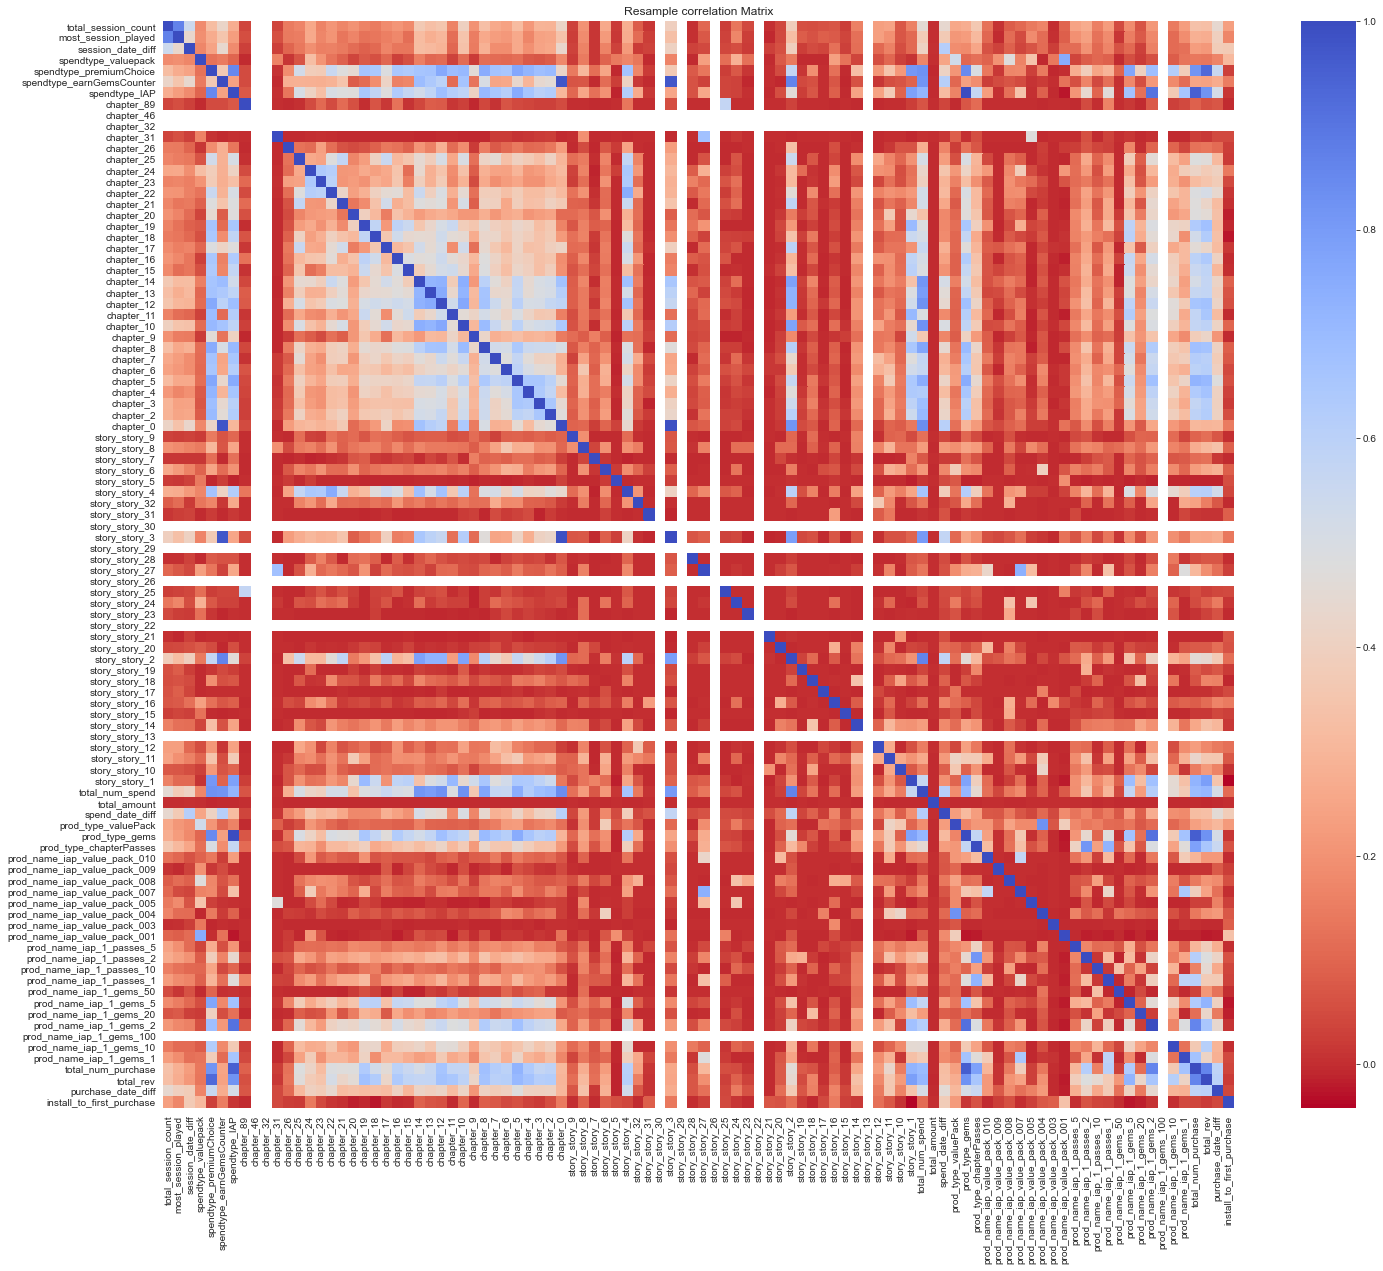

In [134]:
fig, ax = plt.subplots(figsize=(24, 20))

sns.heatmap(X_train_sm[num_feat].corr(), cmap='coolwarm_r',)
ax.set_title('Resample correlation Matrix')
plt.show()

## Build classifier

In [133]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [131]:
y_pred = dt.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)


               precision    recall  f1-score   support

Not Converted       1.00      1.00      1.00      5277
    Converted       1.00      1.00      1.00       367

     accuracy                           1.00      5644
    macro avg       1.00      1.00      1.00      5644
 weighted avg       1.00      1.00      1.00      5644



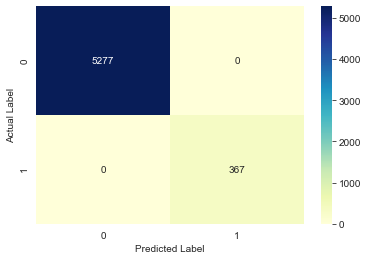

In [134]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Not Converted', 'Converted']
print(classification_report(y_test, y_pred, target_names=labels))

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
gridserach = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
gridserach.fit(X_train_sm, y_train_sm.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [141]:
gridserach.best_params_

{'C': 10.0}

In [142]:
gridserach.best_score_

0.9999682992550325

In [143]:
lr1 = LogisticRegression(C=10, verbose=5)
lr1.fit(X_train_sm, y_train_sm.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(C=10, verbose=5)

In [144]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)


In [145]:
cnf_matrix

array([[5277,    0],
       [   2,  365]])

               precision    recall  f1-score   support

Not Converted       1.00      1.00      1.00      5277
    Converted       1.00      0.99      1.00       367

     accuracy                           1.00      5644
    macro avg       1.00      1.00      1.00      5644
 weighted avg       1.00      1.00      1.00      5644



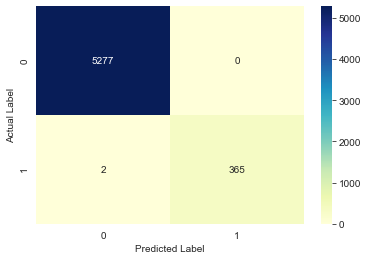

In [146]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Not Converted', 'Converted']
print(classification_report(y_test, y_pre, target_names=labels))

Thank you for letting me do this data challenge. It is a great opportunity for me to learn.